# <strong> Hand-Written digits from 0-9 - Evaluation & Optimization</strong>

Erickson Figueroa <br>
Data Science, Machine Learning & AI<br>

<img src="./evaluation models.jpeg" withd = 500 height = "300">

## 1. <b>Importing Libraries</b>

In [35]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

# Data preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# check scikit-learn version
from sklearn import __version__ as ver
print(f"scikit-learn version: {ver}")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

scikit-learn version: 1.5.0


## 2. <b>Importing and examining data</b>

In [4]:
# Load digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
# View the available attributes of the dataset
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [8]:
# Print the shape of the images attribute
print("Shape of images attribute:", digits.images.shape)

# Print the shape of the target attribute
print("Shape of target attribute:", digits.target.shape)

Shape of images attribute: (1797, 8, 8)
Shape of target attribute: (1797,)


In [9]:
# Print the dataset description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [12]:
# Convert images to a DataFrame (flatten each 8x8 image to a 64-length array)
images_df = pd.DataFrame(digits.images.reshape((digits.images.shape[0], -1)))

# Convert target to a DataFrame
target_df = pd.DataFrame(digits.target, columns=["target"])

# Concatenate both DataFrames
digits_df = pd.concat([images_df, target_df], axis=1)

# Display the first few rows of the DataFrame
print(digits_df.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


## 3. <b>Split the Data</b>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

## 4. <b>Train and Evaluate SVM</b>


SVM Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



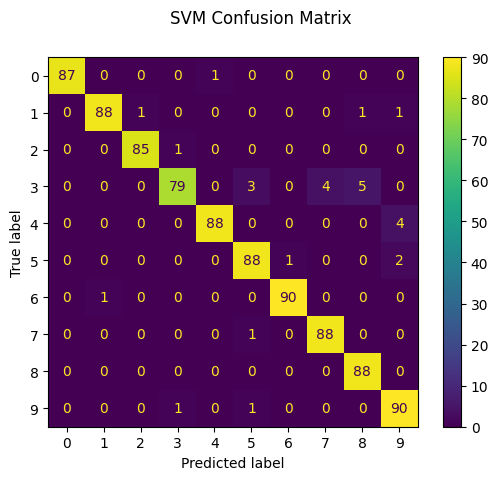

Class 0:
  True Positives (TP): 87
  True Negatives (TN): 811
  False Positives (FP): 0
  False Negatives (FN): 1
Class 1:
  True Positives (TP): 88
  True Negatives (TN): 807
  False Positives (FP): 1
  False Negatives (FN): 3
Class 2:
  True Positives (TP): 85
  True Negatives (TN): 812
  False Positives (FP): 1
  False Negatives (FN): 1
Class 3:
  True Positives (TP): 79
  True Negatives (TN): 806
  False Positives (FP): 2
  False Negatives (FN): 12
Class 4:
  True Positives (TP): 88
  True Negatives (TN): 806
  False Positives (FP): 1
  False Negatives (FN): 4
Class 5:
  True Positives (TP): 88
  True Negatives (TN): 803
  False Positives (FP): 5
  False Negatives (FN): 3
Class 6:
  True Positives (TP): 90
  True Negatives (TN): 807
  False Positives (FP): 1
  False Negatives (FN): 1
Class 7:
  True Positives (TP): 88
  True Negatives (TN): 806
  False Positives (FP): 4
  False Negatives (FN): 1
Class 8:
  True Positives (TP): 88
  True Negatives (TN): 805
  False Positives (FP): 6

In [30]:
# Train the svm
svm_clf = SVC(gamma=0.001)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print("SVM Classification report:\n", metrics.classification_report(y_test, svm_pred))

# Display confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)
disp.figure_.suptitle("SVM Confusion Matrix")
plt.show()

# Calculate and display TP, TN, FP, FN for each class
for i in range(len(cm)):
    tp, tn, fp, fn = calculate_tp_tn_fp_fn(cm, i)
    print(f'Class {i}:')
    print(f'  True Positives (TP): {tp}')
    print(f'  True Negatives (TN): {tn}')
    print(f'  False Positives (FP): {fp}')
    print(f'  False Negatives (FN): {fn}')

### Interpretation, only for SVM. All other algorithms are the same process:

- 87 at (0,0): 87 instances of class 0 were correctly predicted as class 0.

- 1 at (0,4): 1 instance of class 0 was incorrectly predicted as class 4.

- 1 at (1,2): 1 instance of class 1 was incorrectly predicted as class 2.

- 79 at (3,3): 79 instances of class 3 were correctly predicted as class 3.

- 3 at (3,5): 3 instances of class 3 were incorrectly predicted as class 5.

- 4 at (3,7): 4 instances of class 3 were incorrectly predicted as class 7.

- 5 at (3,8): 5 instances of class 3 were incorrectly predicted as class 8.

- 88 at (4,4): 88 instances of class 4 were correctly predicted as class 4.

- 4 at (4,9): 4 instances of class 4 were incorrectly predicted as class 9.

## 5. <b>Train and Evaluate Logistic Regression</b>

Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.93      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.93      0.90        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



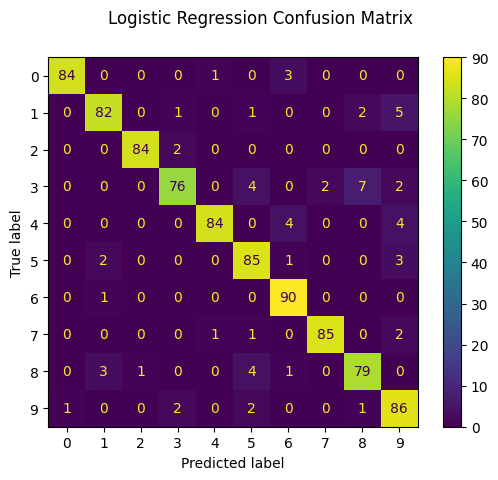

In [26]:
# Train Logistic Regression
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

# Print classification report
print("Logistic Regression Classification report:\n", metrics.classification_report(y_test, lr_pred))

# Display confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, lr_pred)
disp.figure_.suptitle("Logistic Regression Confusion Matrix")
plt.show()

## 6. <b>Train and Evaluate KNN</b>

KNN Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



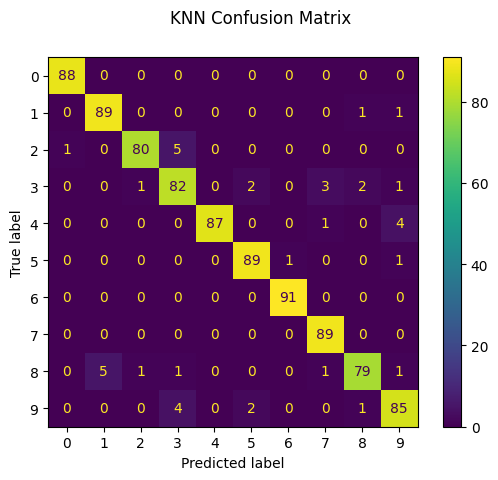

In [31]:
# Train KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

# Print classification report
print("KNN Classification report:\n", metrics.classification_report(y_test, knn_pred))

# Display confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)
disp.figure_.suptitle("KNN Confusion Matrix")
plt.show()

7. ## <b>Evaluate and Compare Models</b>

In [34]:
# List of models and their predictions
models = ["SVM", "Logistic Regression", "KNN"]
predictions = [svm_pred, lr_pred, knn_pred]

# Evaluate and compare models
for i, model in enumerate(models):
    accuracy = accuracy_score(y_test, predictions[i])
    precision = precision_score(y_test, predictions[i], average='weighted')
    recall = recall_score(y_test, predictions[i], average='weighted')
    f1 = f1_score(y_test, predictions[i], average='weighted')
    
    # printing metrics
    print(f"{model} Metrics:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")
    print()

# Select the best model based on the metrics
best_model_idx = np.argmax([accuracy_score(y_test, pred) for pred in predictions])
best_model = models[best_model_idx]
print(f"Best performing model: {best_model}")

SVM Metrics:
  Accuracy: 0.97
  Precision: 0.97
  Recall: 0.97
  F1-score: 0.97

Logistic Regression Metrics:
  Accuracy: 0.93
  Precision: 0.93
  Recall: 0.93
  F1-score: 0.93

KNN Metrics:
  Accuracy: 0.96
  Precision: 0.96
  Recall: 0.96
  F1-score: 0.96

Best performing model: SVM


## 7. <b>Select the Best Performer and Perform Hyperparameter Tuning</b>

In this case the model that obtained the best result was SVM with 97% of Accuracy. I will perform the hyperparameter fitting using grid search and random search.

### Grid Search for SVM

In [36]:
param_grid = {
    'gamma': [1e-3, 1e-4],
    'C': [1, 10, 100, 1000]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Grid Search Best Estimator:\n", grid_search.best_estimator_)

Best parameters found by Grid Search: {'C': 10, 'gamma': 0.001}
Grid Search Best Estimator:
 SVC(C=10, gamma=0.001)


### Random Search for SVM

In [37]:
param_dist = {
    'gamma': expon(scale=0.1),
    'C': expon(scale=100)
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found by Random Search:", random_search.best_params_)
print("Random Search Best Estimator:\n", random_search.best_estimator_)

Best parameters found by Random Search: {'C': 89.75047213097605, 'gamma': 0.004756384975640855}
Random Search Best Estimator:
 SVC(C=89.75047213097605, gamma=0.004756384975640855)


## 8.  <b>Brief summary of the performance of classification models and hyperparameter fitting techniques.</b>

## Model Performance Comparison

### SVM Metrics:
- **Accuracy:** 0.97
- **Precision:** 0.97
- **Recall:** 0.97
- **F1-score:** 0.97

### Logistic Regression Metrics:
- **Accuracy:** 0.93
- **Precision:** 0.93
- **Recall:** 0.93
- **F1-score:** 0.93

### KNN Metrics:
- **Accuracy:** 0.96
- **Precision:** 0.96
- **Recall:** 0.96
- **F1-score:** 0.96

### Best Performing Model: <b>SVM</b>

---

### Best parameters found for SVM by Grid Search:
- {'C': 10, 'gamma': 0.001}

### Grid Search Best Estimator:
- SVC(C=10, gamma=0.001)

---

### Best parameters found for SVM by Random Search:
- {'C': 89.75047213097605, 'gamma': 0.004756384975640855}

### Random Search Best Estimator:
- SVC(C=89.75047213097605, gamma=0.004756384975640855)
